# Task 1

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loaded datasets

In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
print("Customers:")
print(customers_df.head())

print("Products:")
print(products_df.head())

print("Transactions:")
print(transactions_df.head())

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-0

#### Structure of each dataset

In [4]:
customers_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


#### Checked for duplicates

In [5]:
print(customers_df.duplicated(subset='CustomerID').sum())
print(products_df.duplicated(subset='ProductID').sum())
print(transactions_df.duplicated(subset='TransactionID').sum())

0
0
0


#### Checked for missing values

In [6]:
print("Missing in Customers:\n", customers_df.isnull().sum())
print("Missing in Products:\n", products_df.isnull().sum())
print("Missing in Transactions:\n", transactions_df.isnull().sum())

Missing in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
customers_df.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
products_df.drop_duplicates(subset='ProductID', keep='first', inplace=True)
transactions_df.drop_duplicates(subset='TransactionID', keep='first', inplace=True)

#### Converted date columns to datetime

In [8]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [9]:
products_df['Price'] = pd.to_numeric(products_df['Price'], errors='coerce')
transactions_df['Quantity'] = pd.to_numeric(transactions_df['Quantity'], errors='coerce')
transactions_df['TotalValue'] = pd.to_numeric(transactions_df['TotalValue'], errors='coerce')
transactions_df['Price'] = pd.to_numeric(transactions_df['Price'], errors='coerce')

In [ ]:
customers_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non

### Merged the DataFrames

In [10]:
trans_products_df = pd.merge(
    transactions_df,
    products_df,
    on='ProductID',
    how='left',
    suffixes=('_trans', '_prod')
)


In [11]:
full_df = pd.merge(
    trans_products_df,
    customers_df,
    on='CustomerID',
    how='left'
)


In [12]:
print(full_df.head())
full_df.info()


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_trans                      ProductName     Category  \
0      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
1      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
2      300.68       300.68  ComfortLiving Bluetooth Speaker  Electronics   
3      601.36       300.68  ComfortLiving Bluetooth Speaker  Electronics   
4      902.04       300.68  ComfortLiving Bluetooth Speaker  Electronics   

   Price_prod     CustomerName         Region SignupDate  
0      300.68   Andrea Jenkins         Europe 2022-12-03  
1   

Step 6: Basic Exploratory Analysis

In [13]:
full_df[['Quantity', 'TotalValue', 'Price_trans']].describe()

,Quantity,TotalValue,Price_trans
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [19]:
print("Unique Customers :", full_df['CustomerID'].nunique())

Unique Customers : 199


In [18]:
print("Unique Products :", full_df['ProductID'].nunique())

Unique Products : 100


In [17]:
print("Total Transactions :", full_df['TransactionID'].nunique())

Total Transactions : 1000


In [20]:
total_revenue = full_df['TotalValue'].sum()
print("Total Revenue :", total_revenue)

Total Revenue : 689995.56


### Explored Key Dimensions

#### Time based analysis : Extracted Month/Year to observe trends

In [21]:
full_df['Month'] = full_df['TransactionDate'].dt.to_period('M')
monthly_df = full_df.groupby('Month')['TransactionID'].count().reset_index()

In [22]:
# Converted Period to datetime for plotting
monthly_df['Month'] = monthly_df['Month'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

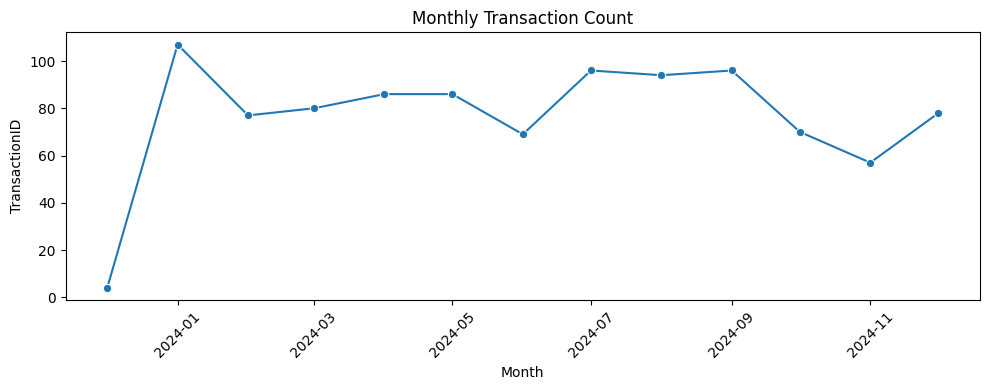

In [23]:
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_df, x='Month', y='TransactionID', marker='o')
plt.title("Monthly Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Category-Wise Sales

In [24]:
category_sales = full_df.groupby('Category')['TotalValue'].sum().reset_index()
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

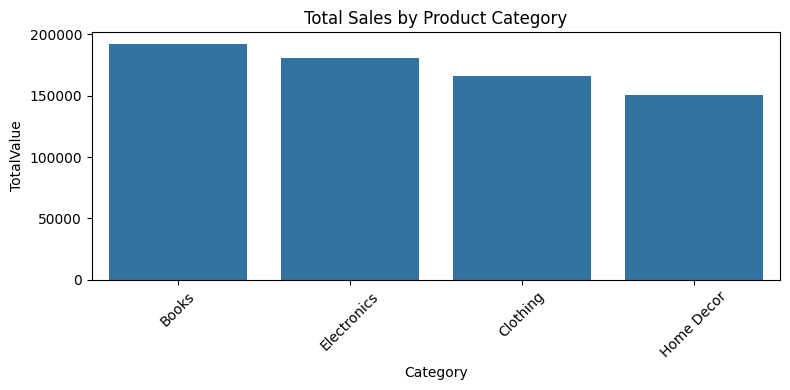

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(data=category_sales, x='Category', y='TotalValue')
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Regional Customer Distribution

In [26]:
region_count = customers_df['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']

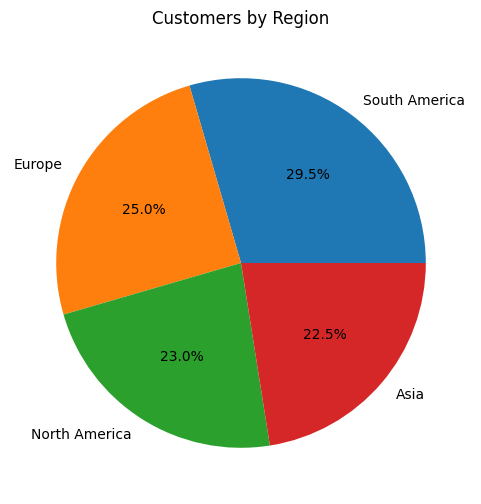

In [27]:
plt.figure(figsize=(6,6))
plt.pie(region_count['Count'], labels=region_count['Region'], autopct='%1.1f%%')
plt.title("Customers by Region")
plt.show()

#### Average Order Value (AOV)


In [28]:
total_transactions = full_df['TransactionID'].nunique()
AOV = total_revenue / total_transactions
print("Average Order Value (AOV) :", AOV)

Average Order Value (AOV) : 689.9955600000001
